In [64]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel

In [27]:
df = pd.read_csv("diabetes.csv")
df

,P1,P2,P3,P4,P4.1,P5,P6,P7,T
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [28]:
df.describe()

,P1,P2,P3,P4,P4.1,P5,P6,P7,T
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P1      768 non-null    int64  
 1   P2      768 non-null    int64  
 2   P3      768 non-null    int64  
 3   P4      768 non-null    int64  
 4   P4.1    768 non-null    int64  
 5   P5      768 non-null    float64
 6   P6      768 non-null    float64
 7   P7      768 non-null    int64  
 8   T       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


            P1        P2        P3        P4      P4.1        P5        P6  \
P1    1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
P2    0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
P3    0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
P4   -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
P4.1 -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
P5    0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
P6   -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
P7    0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
T     0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844   

            P7         T  
P1    0.544341  0.221898  
P2    0.263514  0.466581  
P3    0.239528  0.065068  
P4   -0.113970  0.074752  
P4.1 -0.042163  0.130548  
P5    0.036242  0.292695  
P6    0.033561  0.173844  
P7 

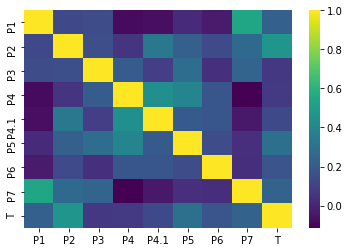

In [30]:
corr = df.corr()
print(corr)
sns.heatmap(corr, cmap='viridis')

In [48]:
# split data into X and y
X = df.iloc[:, 0:8]
y = df["T"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 )

In [51]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [53]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.59%


In [58]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
n_estimators = [50, 100, 150, 200]
max_depth = [2, 3, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

[2, 3, 4, 6, 8]
Best: -0.481847 using {'max_depth': 2, 'n_estimators': 50}


[0.11826812 0.35275036 0.04312551 0.06407958 0.06926734 0.15376033
 0.06070097 0.1380478 ]


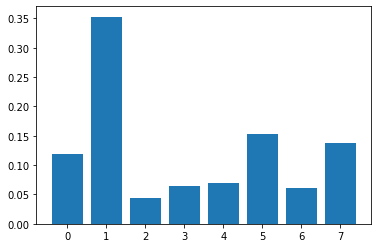

In [61]:
model = XGBClassifier(max_depth=2, n_estimators=50)
model.fit(X_train, y_train)
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [66]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.19%
